In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR,VARMAX

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
fstock=pd.read_csv("C:\\Users\\kasuk\\OneDrive\\Desktop\\python files\\facebook stock.csv", parse_dates=['Date'],index_col='Date',usecols=['Date','Open','High','Low','Close','Volume'])

In [8]:
fstock.index.dtype

dtype('<M8[ns]')

In [9]:
fstock.shape

(2359, 5)

In [10]:
fstock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200


In [11]:
fstock.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
fstock['Open'].corr(fstock['High'])

0.9997998264722853

In [11]:
fstock['Open'].corr(fstock['Low'])

0.9997777123555484

In [12]:
fstock['High'].corr(fstock['Low'])

0.9997176379955542

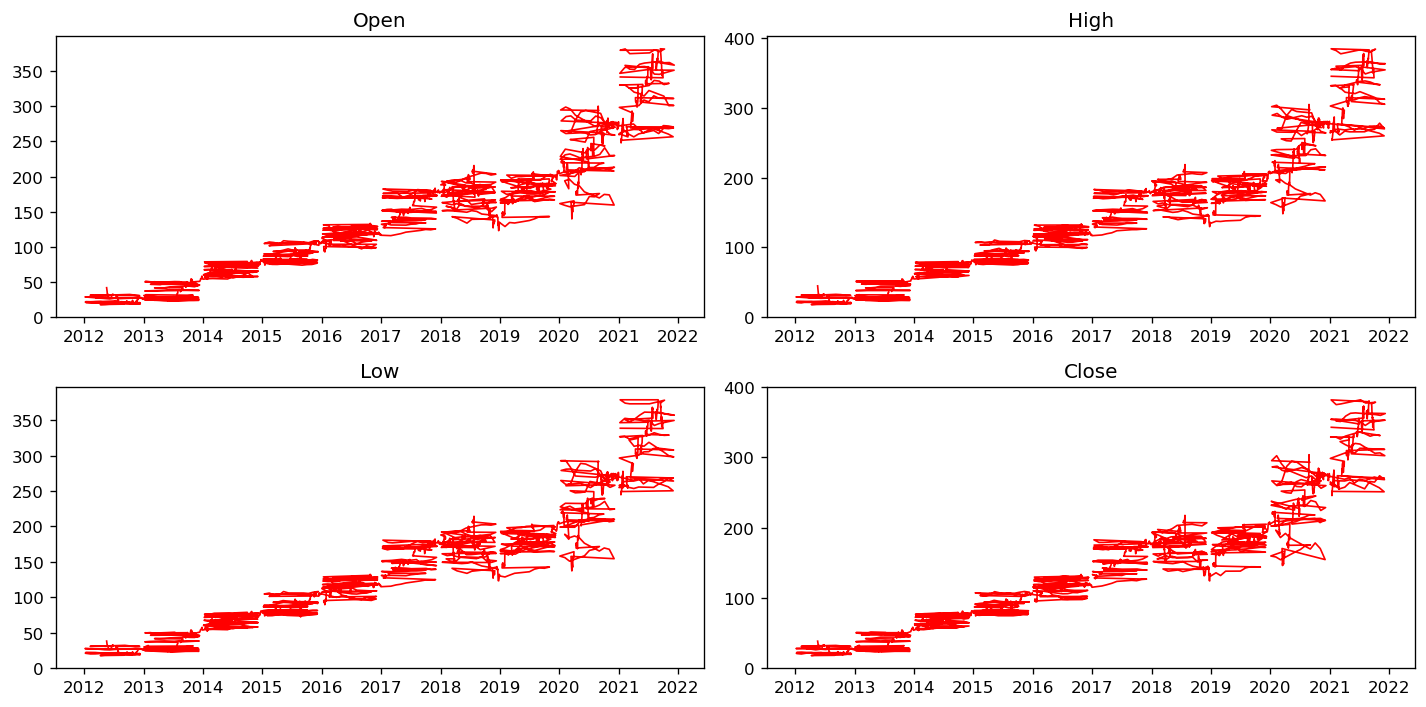

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=2,dpi=120,figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data=fstock[fstock.columns[i]]
    ax.plot(data,color='red',linewidth=1)
    #decoration
    ax.set_title(fstock.columns[i])
    #ax.xaxis.set_ticks_position('none')
    #ax.yaxis.set_ticks_position('none')
    #ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=10)
plt.tight_layout()

In [14]:
test=adfuller(fstock['Open'].diff().dropna())
print(f'ADF ststistics : {test[0]}')
print(f'P-value : {test[1]}')

ADF ststistics : -19.283185782808783
P-value : 0.0


In [15]:
test1=adfuller(fstock['High'].diff().dropna())
print(f'ADF ststistics : {test1[0]}')
print(f'P-value : {test1[1]}')

ADF ststistics : -10.335881026703202
P-value : 2.764828811572249e-18


In [16]:
test2=adfuller(fstock['Low'].diff().dropna())
print(f'ADF ststistics : {test2[0]}')
print(f'P-value : {test2[1]}')

ADF ststistics : -10.614203250598306
P-value : 5.730451498379598e-19


In [17]:
test4=adfuller(fstock['Close'].diff().dropna())
print(f'ADF ststistics : {test4[0]}')
print(f'P-value : {test4[1]}')

ADF ststistics : -10.286515841568193
P-value : 3.662869912811199e-18


In [18]:
#granger causality
print('open granger causes high?')
granger=grangercausalitytests(fstock[['Open','High']],4)

open granger causes high?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1061.4737, p=0.0000  , df_denom=2355, df_num=1
ssr based chi2 test:   chi2=1062.8259, p=0.0000  , df=1
likelihood ratio test: chi2=877.3369, p=0.0000  , df=1
parameter F test:         F=1061.4737, p=0.0000  , df_denom=2355, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=568.9847, p=0.0000  , df_denom=2352, df_num=2
ssr based chi2 test:   chi2=1140.3886, p=0.0000  , df=2
likelihood ratio test: chi2=930.1357, p=0.0000  , df=2
parameter F test:         F=568.9847, p=0.0000  , df_denom=2352, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=396.8983, p=0.0000  , df_denom=2349, df_num=3
ssr based chi2 test:   chi2=1194.2433, p=0.0000  , df=3
likelihood ratio test: chi2=966.0798, p=0.0000  , df=3
parameter F test:         F=396.8983, p=0.0000  , df_denom=2349, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [19]:
print('high granger causes open?')
granger1=grangercausalitytests(fstock[['High','Open']],4)

high granger causes open?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=39.0675 , p=0.0000  , df_denom=2355, df_num=1
ssr based chi2 test:   chi2=39.1173 , p=0.0000  , df=1
likelihood ratio test: chi2=38.7964 , p=0.0000  , df=1
parameter F test:         F=39.0675 , p=0.0000  , df_denom=2355, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.6684 , p=0.0000  , df_denom=2352, df_num=2
ssr based chi2 test:   chi2=37.4161 , p=0.0000  , df=2
likelihood ratio test: chi2=37.1222 , p=0.0000  , df=2
parameter F test:         F=18.6684 , p=0.0000  , df_denom=2352, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.9959 , p=0.0000  , df_denom=2349, df_num=3
ssr based chi2 test:   chi2=45.1218 , p=0.0000  , df=3
likelihood ratio test: chi2=44.6952 , p=0.0000  , df=3
parameter F test:         F=14.9959 , p=0.0000  , df_denom=2349, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

In [20]:
print('open granger causes close?')
granger1=grangercausalitytests(fstock[['Open','Close']],4)

open granger causes close?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3064.7522, p=0.0000  , df_denom=2355, df_num=1
ssr based chi2 test:   chi2=3068.6563, p=0.0000  , df=1
likelihood ratio test: chi2=1965.4151, p=0.0000  , df=1
parameter F test:         F=3064.7522, p=0.0000  , df_denom=2355, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1527.7907, p=0.0000  , df_denom=2352, df_num=2
ssr based chi2 test:   chi2=3062.0771, p=0.0000  , df=2
likelihood ratio test: chi2=1962.2871, p=0.0000  , df=2
parameter F test:         F=1527.7907, p=0.0000  , df_denom=2352, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1021.0797, p=0.0000  , df_denom=2349, df_num=3
ssr based chi2 test:   chi2=3072.3675, p=0.0000  , df=3
likelihood ratio test: chi2=1966.4900, p=0.0000  , df=3
parameter F test:         F=1021.0797, p=0.0000  , df_denom=2349, df_num=3

Granger Causality
number of lags (no zero) 4
ssr

In [21]:
print('close granger causes open?')
granger1=grangercausalitytests(fstock[['Close','Open']],4)

close granger causes open?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8464  , p=0.0157  , df_denom=2355, df_num=1
ssr based chi2 test:   chi2=5.8539  , p=0.0155  , df=1
likelihood ratio test: chi2=5.8466  , p=0.0156  , df=1
parameter F test:         F=5.8464  , p=0.0157  , df_denom=2355, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2694  , p=0.2812  , df_denom=2352, df_num=2
ssr based chi2 test:   chi2=2.5443  , p=0.2802  , df=2
likelihood ratio test: chi2=2.5429  , p=0.2804  , df=2
parameter F test:         F=1.2694  , p=0.2812  , df_denom=2352, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6897  , p=0.0007  , df_denom=2349, df_num=3
ssr based chi2 test:   chi2=17.1200 , p=0.0007  , df=3
likelihood ratio test: chi2=17.0581 , p=0.0007  , df=3
parameter F test:         F=5.6897  , p=0.0007  , df_denom=2349, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F tes

In [22]:
train=fstock[:-500]
test=fstock[-500:]

In [23]:
test

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-10,179.160004,180.720001,177.940002,179.850006,7556900
2019-10-10,180.320007,181.610001,179.169998,180.029999,8605000
2019-11-10,182.149994,186.490005,182.139999,184.190002,14930500
2019-10-14,184.199997,184.619995,182.570007,183.279999,7006000
2019-10-15,183.800003,190.380005,183.660004,188.889999,15039100
...,...,...,...,...,...
2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800
2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300
2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200


In [24]:
test.shape

(500, 5)

In [25]:
var=VAR(train.diff()[1:])

In [26]:
order=var.select_order(maxlags=10)
print(order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        36.53       36.54   7.296e+15       36.53
1        35.34       35.43   2.224e+15       35.37
2        34.89       35.06   1.422e+15       34.95
3        34.64       34.88   1.102e+15       34.72
4        34.54       34.86   1.004e+15       34.66
5        34.46       34.84   9.205e+14       34.60
6        34.37      34.83*   8.452e+14       34.54
7        34.33       34.87   8.099e+14       34.53
8        34.30       34.91   7.867e+14       34.52
9        34.25       34.94   7.517e+14      34.51*
10      34.24*       35.00  7.440e+14*       34.52
--------------------------------------------------


In [27]:
model=VARMAX(train,order=(10,0),enforce_stationary=True)
fitted_model=model.fit()
print(fitted_model.summary())

                                       Statespace Model Results                                       
Dep. Variable:     ['Open', 'High', 'Low', 'Close', 'Volume']   No. Observations:                 1859
Model:                                                VAR(10)   Log Likelihood              -44933.606
                                                  + intercept   AIC                          90407.211
Date:                                        Thu, 06 Oct 2022   BIC                          91899.716
Time:                                                11:20:22   HQIC                         90957.256
Sample:                                                     0                                         
                                                       - 1859                                         
Covariance Type:                                          opg                                         
Ljung-Box (L1) (Q):      0.45, 0.15, 0.08, 0.00, 8.59   Jarque-Bera (JB):

In [28]:
predicted_train=fitted_model.predict(start='2012-05-18',end='2019-08-10	')

In [29]:
concatination=pd.concat([train,predicted_train],axis=1)

In [76]:
concatination[:1865]

,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,106.084441,107.013741,104.996478,106.101163,3.527356e+07
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,37.853803,41.063458,34.360796,37.513701,3.677650e+08
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,32.856833,34.698701,30.556724,33.369847,1.845425e+08
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,31.382386,32.975672,30.006215,32.233942,1.517144e+08
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,32.248347,33.018086,30.946322,31.923375,1.111663e+08
...,...,...,...,...,...,...,...,...,...,...
2019-02-10,174.839996,176.529999,173.089996,174.600006,16151700,175.955071,178.152515,174.424004,176.762543,1.253439e+07
2019-03-10,175.570007,179.839996,173.630005,179.380005,16086300,174.553804,176.979673,172.649800,175.106083,1.874342e+07
2019-04-10,179.550003,180.979996,178.100006,180.449997,10430200,179.657770,181.503175,178.011961,179.666850,1.257715e+07


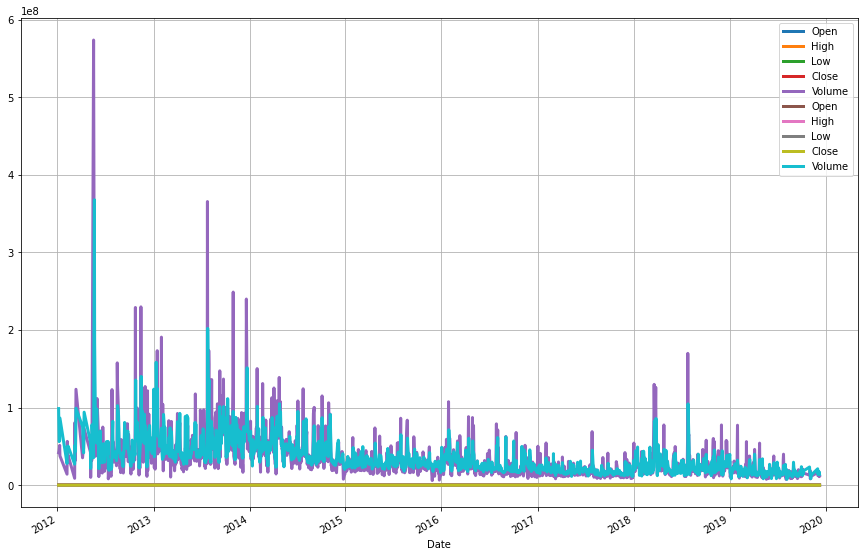

In [83]:
concatination.plot(figsize=(15,10),linewidth=3)
plt.grid()
